# Morphological Operations

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [81]:
square = np.zeros((256, 256), np.uint8)
lower = int(0.25*256)
upper = int(0.75*256)
square[lower:upper, lower:upper] = 255

In [82]:
circle = np.zeros((256, 256), dtype=np.uint8)
cv2.circle(circle, (128, 128), 32, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [83]:
shape = np.zeros((256, 256), dtype=np.uint8)
cv2.rectangle(shape, (64, 32), (96, 224), 255, -1)
cv2.rectangle(shape, (160, 32), (192, 224), 255, -1)
cv2.rectangle(shape, (96, 192), (160, 224), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

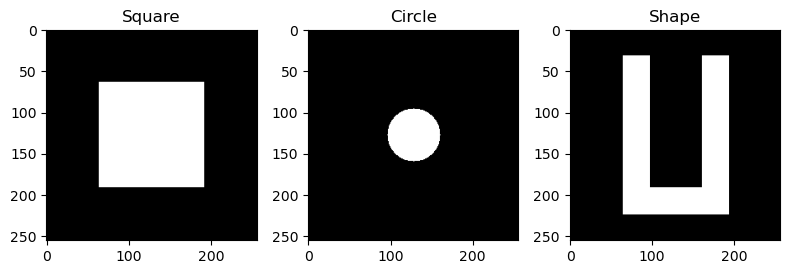

In [84]:
fig, axes = plt.subplots(1, 3, figsize = (8, 5))
axes[0].imshow(square, cmap='gray')
axes[0].set_title('Square')
axes[1].imshow(circle, cmap='gray')
axes[1].set_title('Circle')
axes[2].imshow(shape, cmap='gray')
axes[2].set_title('Shape')
plt.tight_layout()
plt.show()

C:\Users\fongc\AppData\Local\Temp\ipykernel_7808\3531686710.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


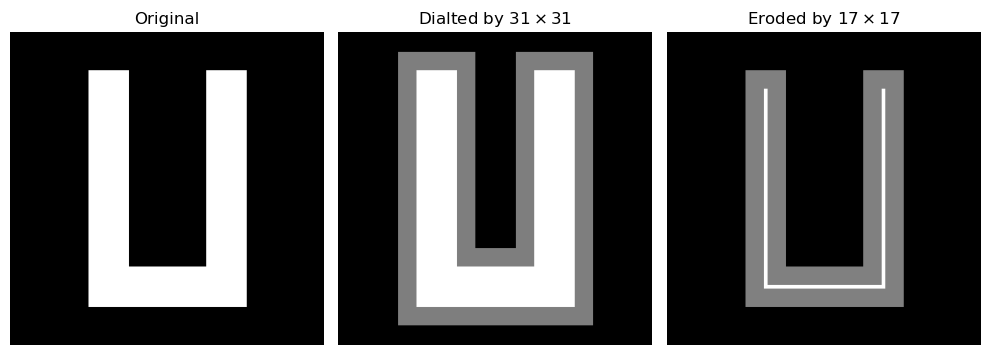

In [85]:
# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(shape, cmap="gray")
axes[0].set_title('Original')
axes[1].imshow(shape, cmap="gray")
axes[1].imshow(cv2.dilate(shape, np.ones((31, 31), np.uint8), iterations=1), cmap="gray", alpha=0.5)
axes[1].set_title("Dialted by $31 \\times 31$")
axes[2].imshow(shape, cmap="gray")
axes[2].imshow(cv2.erode(shape, np.ones((31, 31), np.uint8), iterations=1), cmap="gray", alpha=0.5)
axes[2].set_title("Eroded by $17\\times17$")
for i in range(3):
    axes[i].axis('off')
fig.tight_layout()
fig.show()

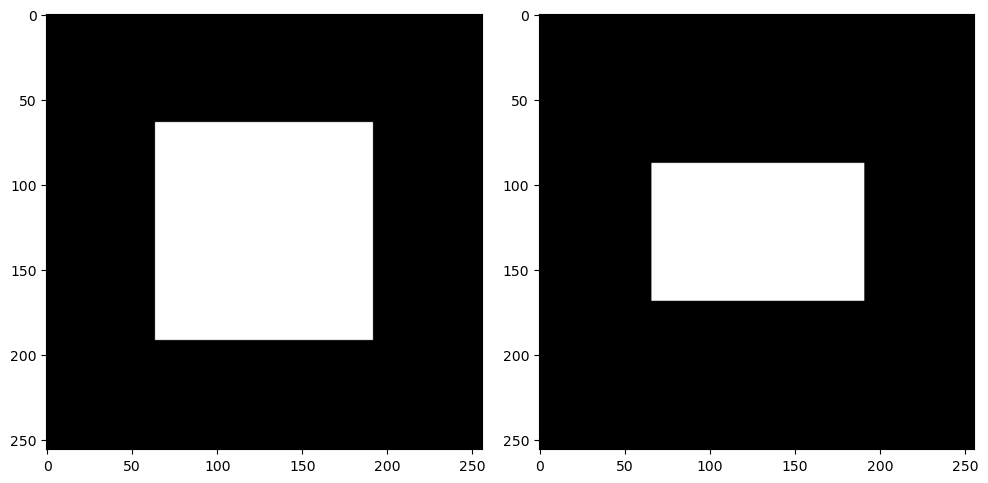

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].imshow(square, cmap="gray")
axes[1].imshow(cv2.erode(square, np.ones((48, 4), np.uint8), iterations=1), cmap="gray")
plt.tight_layout()
plt.show()

Available moprhological operations are:
- **Erosion:** `cv2.erode(image, kernel, iterations=1)`
- **Dilation:** `cv2.dilate(image, kernel, iterations=1)`
- **Opening:** `cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)`
- **Closing:** `cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)`

In [235]:
def make_cross(size, thickness=2):
    cross = np.zeros((size, size), dtype=np.uint8)
    cv2.line(cross, (0, size//2), (size, size//2), 255, thickness)
    cv2.line(cross, (size//2, 0), (size//2, size), 255, thickness)
    return cross

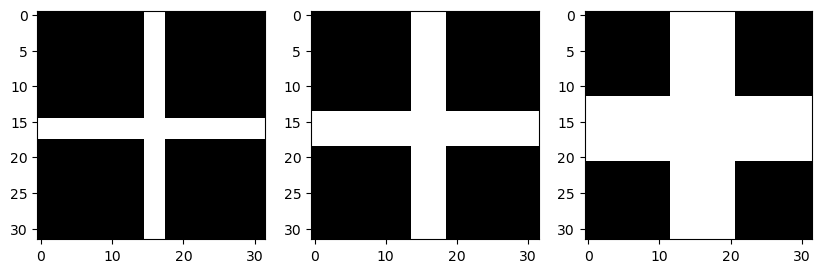

In [238]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(make_cross(32, thickness=2), cmap="gray")
axes[1].imshow(make_cross(32, thickness=4), cmap="gray")
axes[2].imshow(make_cross(32, thickness=8), cmap="gray")
plt.show()

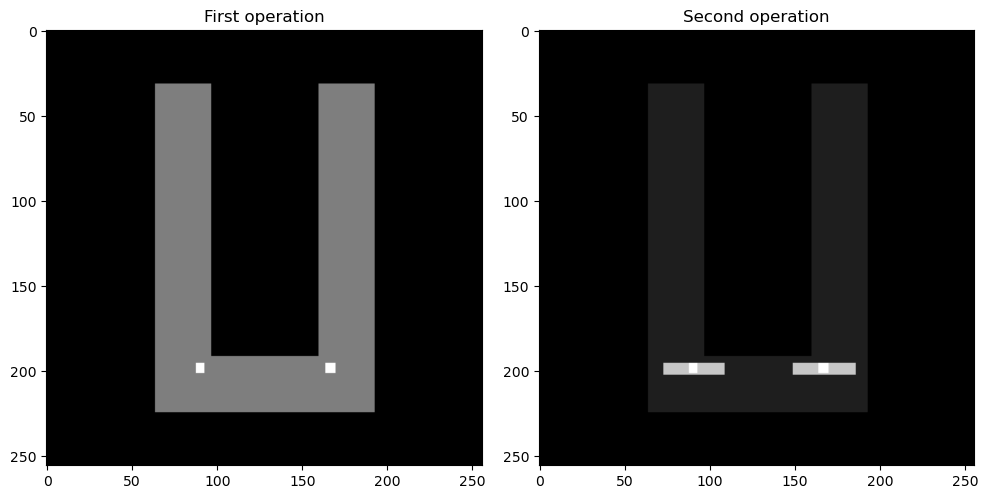

In [239]:
fig, axes = plt.subplots(1, 2, figsize = (10,6))

# first operation
# first_se = np.ones((4, 64), dtype=np.uint8)
first_se = make_cross(48, thickness=8)
first_op = cv2.erode(shape, first_se, iterations=1)
# first_op = cv2.morphologyEx(shape, cv2.MORPH_OPEN, first_se)

# second operation
# second_se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
# second_op = cv2.morphologyEx(first_op, cv2.MORPH_OPEN, second_se)
second_se = np.ones((2, 32), dtype=np.uint8)
second_op = cv2.dilate(first_op, second_se, iterations=1)

axes[0].imshow(first_op, cmap="gray")
axes[0].imshow(shape, cmap="gray", alpha=0.5)
axes[0].set_title("First operation")
axes[1].imshow(second_op, cmap="gray")
axes[1].imshow(first_op, cmap="gray", alpha=0.25)
axes[1].imshow(shape, cmap="gray", alpha=0.125)
axes[1].set_title("Second operation")

plt.tight_layout()
plt.show()

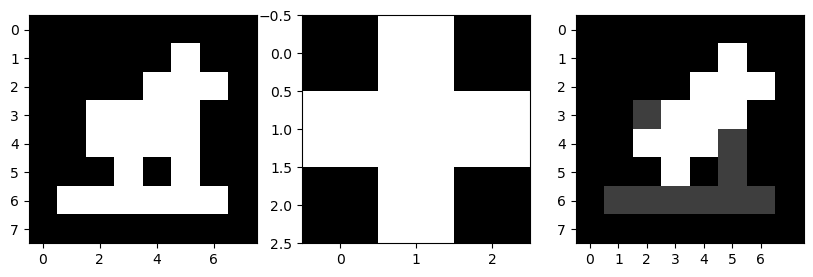

In [88]:
object = np.zeros((8, 8), np.uint8)
object[1, 5] = 255
object[2, 4:7] = 255
object[3, 2:6] = 255
object[4, 2:6] = 255
object[5, [3, 5]] = 255
object[6, 1:7] = 255

se = np.zeros((3,3), np.uint8)
se[0,1] = 255
se[1,0:3] = 255
se[2,1] = 255

fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(object, cmap="gray")
axes[1].imshow(se, cmap="gray")
axes[2].imshow(cv2.morphologyEx(object, cv2.MORPH_OPEN, se), cmap="gray")
axes[2].imshow(object, cmap="gray", alpha=0.25)
axes[2].set_xticks(np.arange(0, 7))

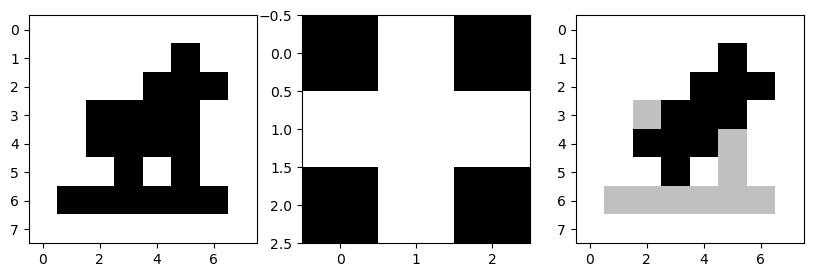

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(255-object, cmap="gray")
axes[1].imshow(se, cmap="gray")
axes[2].imshow(cv2.morphologyEx(255-object, cv2.MORPH_CLOSE, se), cmap="gray")
axes[2].imshow(255-object, cmap="gray", alpha=0.25)